### Import necessary libraries

In [1]:
#!pip install distance

In [3]:
import pandas as pd
import networkx as nx
import openpyxl
import distance
import matplotlib.pyplot as plt
import gseapy as gp
from gseapy import Biomart
bm = Biomart()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import gseapy as gp

### Import PPI data

Link to columns explanation → https://wiki.thebiogrid.org/doku.php/biogrid_tab_version_3.0

In [4]:
# Define file path
file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/PPI/BIOGRID-ORGANISM-Homo_sapiens-4.4.231.tab3.txt"

# Read the file
ppi_data = pd.read_csv(file_path, sep="\t")

/var/folders/_s/9tvv9sbd3hld86_pfz5vn_d80000gn/T/ipykernel_4651/2593232484.py:5: DtypeWarning: Columns (1,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  ppi_data = pd.read_csv(file_path, sep="\t")


In [5]:
ppi_data.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


Filter out all non-human interactions


In [6]:
human_ppi_data = ppi_data[(ppi_data['Organism Name Interactor A'] == "Homo sapiens") & (ppi_data['Organism Name Interactor B'] == "Homo sapiens")]

In [7]:
human_ppi_data.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


Keep only “physical” interactions” (“Experimental System Type” = physical)


In [8]:
human_ppi_data = human_ppi_data[human_ppi_data['Experimental System Type'] == 'physical']

In [9]:
human_ppi_data.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


#### Create PPI network

Check for number of uniques gene in the human_ppi_data --> these will be the nodes of our graph

In [10]:
# Count unique genes
ppi_gene_list = human_ppi_data['Official Symbol Interactor A'].tolist() + human_ppi_data['Official Symbol Interactor B'].tolist()
ppi_unique_genes = set(ppi_gene_list)
ppi_gene_counts = len(ppi_unique_genes)
print(f"Number of uniques in the human_ppi_data dataset: {ppi_gene_counts}")

Number of uniques in the human_ppi_data dataset: 19845


Let's see the minimum number of edge that we expect from the graph:

In [14]:
print(f"Number of expected edges in the PPI graph: {int(len(ppi_gene_list)/2)}" )

Number of expected edges in the PPI graph: 1108087


Create the graph from human_ppi_data

In [15]:
# Create a graph
ppi_network = nx.Graph()

# Add edges to the graph --> add an edge if two genes share a ppi
for index, row in human_ppi_data.iterrows():
    ppi_network.add_edge(row['Official Symbol Interactor A'], row['Official Symbol Interactor B'])

Let's have a look at the number of nodes and number of edge in the network

In [16]:
# Print nodes and edges
print("Nodes lenght:", len(ppi_network.nodes()))
print("Edges lenght:", len(ppi_network.edges()))

Nodes lenght: 19845
Edges lenght: 832361


NB: Effective edges lenght is lower than the expected edges kenght because networkx automatically removes the redundant edges.

Remove the self-loops

In [17]:
# Remove self-loops
ppi_network.remove_edges_from([(n, n) for n in ppi_network.nodes()])

In [18]:
# Print nodes and edges
print("Nodes len:", len(ppi_network.nodes()))
print("Edges len:", len(ppi_network.edges()))

Nodes len: 19845
Edges len: 829115


Extract all the connected components from the ppi_network

In [19]:
# Get a list of connected components
connected_components = list(nx.connected_components(ppi_network))
print(f"In our graph we have a total of {len(connected_components)} connected components")

for i, component in enumerate(connected_components):
    print(f"Connected component {i+1} size:", len(component))

In our graph we have a total of 6 connected components
Connected component 1 size: 19840
Connected component 2 size: 1
Connected component 3 size: 1
Connected component 4 size: 1
Connected component 5 size: 1
Connected component 6 size: 1


And select the largest connected component

In [20]:
# Find the largest connected component
largest_component = max(connected_components, key=len)

# Create a subgraph containing only nodes from the largest component
LCC_ppi_subgraph = ppi_network.subgraph(largest_component)

# Print nodes and edges of the largest connected component
print("Nodes in the largest connected component:", len(LCC_ppi_subgraph.nodes()))
print("Edges in the largest connected component:", len(LCC_ppi_subgraph.edges()))

Nodes in the largest connected component: 19840
Edges in the largest connected component: 829115


### Import FI data


In [24]:
# Define the file path
file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/FI/FIsInGene_070323_with_annotations.txt"

# Read the file into a DataFrame using pandas
fi_data = pd.read_csv(file_path, sep="\t")

In [25]:
fi_data.head()

,Gene1,Gene2,Annotation,Direction,Score
0,A1CF,APOBEC1,catalyzed by; complex; input,<-,1.00
1,A1CF,CELF2,predicted,-,0.90
2,A1CF,EP300,expression regulated by,<-,1.00
3,A1CF,RBM47,predicted,-,0.89
4,A2M,APOA1,inhibit,-|,1.00


#### Create FI network


Check for number of uniques gene in the fi_data --> these will be the nodes of our graph

In [26]:
# Count unique genes
fi_gene_list = fi_data['Gene1'].tolist() + fi_data['Gene2'].tolist()
fi_unique_genes = set(fi_gene_list)
fi_gene_counts = len(fi_unique_genes)
print(f"Number of uniques in the fi_data dataset: {fi_gene_counts}")

Number of uniques in the fi_data dataset: 14034


Let's see the minimum number of edge that we expect from the graph:

In [28]:
print(f"Number of expected edges in the fi_graph: {int(len(fi_gene_list)/2)}" )

Number of expected edges in the fi_graph: 278974


Create the graph from fi_data

In [29]:
# Create a graph
fi_network = nx.Graph()

# Add edges to the graph
for index, row in fi_data.iterrows():
    fi_network.add_edge(row['Gene1'], row['Gene2'])

Let's have a look at the number of nodes and number of edge in the network

In [30]:
# Print nodes and edges
print("Nodes length:", len(fi_network.nodes()))
print("Edges length:", len(fi_network.edges()))

Nodes length: 14034
Edges length: 278974


Now let's remove the self-loops edges

In [31]:
# Remove self-loops
fi_network.remove_edges_from([(n, n) for n in fi_network.nodes()])

In [32]:
# Print nodes and edges
print("Nodes len:", len(fi_network.nodes()))
print("Edges len:", len(fi_network.edges()))

Nodes len: 14034
Edges len: 278974


### Import Drug_Gene_Association data

In [33]:
# Define file path
file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/DRUG_GENE_ASSOCIATION/drug_interaction_results-4_23_2024.tsv"

# Read file
drug_gene_assocation = pd.read_csv(file_path, sep='\t')

### Import GDA data

In [34]:
# Define file path
file_path1 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0001175_acquired_immunodeficiency_syndrome_unfiltered.xlsx"
file_path2 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0001811_aging_unfiltered.xlsx"
file_path3 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0002170_alopecia_CURATED.xlsx"
file_path4 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0002962_angina_pectoris_unfiltered.xlsx"
file_path5 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0003467_anxiety_unfiltered.xlsx"
file_path6 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0003873_rheumatoid_arthritis_CURATED.xlsx"
file_path7 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0004623_bacterial_infections_unfiltered.xlsx"
file_path8 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0005956_bone_marrow_diseases_unfiltered.xlsx"
file_path9 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0007222_cardiovascular_diseases_CURATED.xlsx"
file_path10 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0009402_colorectal_carcinoma_CURATED.xlsx"
file_path11 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0010481_cushing_syndrome_unfiltered.xlsx"
file_path12 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0011581_depressive_disorder_CURATED.xlsx"
file_path13 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0011630_dermatomycoses_unfiltered.xlsx"
file_path14 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0011849_diabetes_mellitus_CURATED.xlsx"
file_path15 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0014544_epilepsy_CURATED.xlsx"
file_path16 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0018801_heart_failure_CURATED.xlsx"
file_path17 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0023418_leukemia_CURATED.xlsx"
file_path18 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0024299_lymphoma_CURATED.xlsx"
file_path19 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0024796_marfan_syndrome_unfiltered.xlsx"
file_path20 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0026764_multiple_myeloma_CURATED.xlsx"
file_path21 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0026769_multiple_sclerosis_CURATED.xlsx"
file_path22 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0026838_muscle_spasticity_unfiltered.xlsx"
file_path23 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0027498_nausea_vomiting_unfiltered.xlsx"
file_path24 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0028754_obesity_CURATED.xlsx"
file_path25 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0029456_osteoporosis_CURATED.xlsx"
file_path26 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDAC0030193_pain_CURATED.xlsx"
file_path27 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0030499_parasitic_diseases_unfiltered.xlsx"
file_path28 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0030567_parkinson_disease_CURATED.xlsx"
file_path29 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0033038_premature_ejaculation_unfiltered.xlsx"
file_path30 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0033845_idiopathic_intracranial_hypertension_unfiltered.xlsx"
file_path31 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0036341_schizophrenia_CURATED.xlsx"
file_path32 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0042025_urinary_stress_incontinence_unfiltered.xlsx"
file_path33 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0085580_essential_hypertension_unfiltered.xlsx"
file_path34 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0152020_gastroparesis_unfiltered.xlsx"
file_path35 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0206750_coronavirus_infections_unfiltered.xlsx"
file_path36 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0235974_pancreatic_carcinoma_CURATED.xlsx"
file_path37 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0242350_erectile_dysfunction_CURATED.xlsx"
file_path38 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0278580_recurrent_cutaneous_T_cell_lymphoma_unfiltered.xlsx"
file_path39 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0279607_adult_hepatocellular_carcinoma_unfiltered.xlsx"
file_path40 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0334294_multiple_adenomatous_polyps_unfiltered.xlsx"
file_path41 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0343467_erythema_nodosum_leprosum_unfiltered.xlsx"
file_path42 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0403592_chronic_rejection_renal_transplant_unfiltered.xlsx"
file_path43 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0553576_systemic_mycosis_unfiltered.xlsx"
file_path44 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0563625_agnosia_for_pain_unfiltered.xlsx"
file_path45 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0600139_prostate_carcinoma_unfiltered.xlsx"
file_path46 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C0678222_breast_carcinoma_CURATED.xlsx"
file_path47 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C1262477_weight_descreased_CURATED.xlsx"
file_path48 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C1263846_attention_deficit_hyperactivity_disorder_CURATED.xlsx"
file_path49 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C1384584_generalized_osteoarthritis_unfiltered.xlsx"
file_path50 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C1740836_acute_migraine_unfiltered.xlsx"
file_path51 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C2973725_pulmonary_arterial_hypertension_unfiltered.xlsx"
file_path52 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C3854222_human_immunodeficiency_virus_unfiltered.xlsx"
file_path53 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C4048329_immunosuppression_unfiltered.xlsx"
file_path54 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C4075720_severe_alcoholdependence_unfiltered.xlsx"
file_path55 = "/Users/elisa/Desktop/Tesi/PROGETTO/DATI/GDA/C4727087_metastatic_lung_carcinoma_unfiltered.xlsx"


# Read the file
acquired_immunodeficiency_syndrome_unfiltered = pd.read_excel(file_path1)
aging_unfiltered = pd.read_excel(file_path2)
alopecia_curated = pd.read_excel(file_path3)
angina_pectoris_unfiltered = pd.read_excel(file_path4)
anxiety_unfiltered = pd.read_excel(file_path5)
rheumatoid_arthritis_CURATED = pd.read_excel(file_path6)
bacterial_infections_unfiltered = pd.read_excel(file_path7)
bone_marrow_diseases_unfiltered = pd.read_excel(file_path8)
cardiovascular_diseases_CURATED = pd.read_excel(file_path9)
colorectal_carcinoma_CURATED = pd.read_excel(file_path10)
cushing_syndrome_unfiltered = pd.read_excel(file_path11)
depressive_disorder_CURATED = pd.read_excel(file_path12)
dermatomycoses_unfiltered = pd.read_excel(file_path13)
diabetes_mellitus_CURATED = pd.read_excel(file_path14)
epilepsy_CURATED = pd.read_excel(file_path15)
heart_failure_CURATED = pd.read_excel(file_path16)
leukemia_CURATED = pd.read_excel(file_path17)
lymphoma_CURATED = pd.read_excel(file_path18)
marfan_syndrome_unfiltered = pd.read_excel(file_path19)
multiple_myeloma_CURATED = pd.read_excel(file_path20)
multiple_sclerosis_CURATED = pd.read_excel(file_path21)
muscle_spasticity_unfiltered = pd.read_excel(file_path22)
nausea_vomiting_unfiltered = pd.read_excel(file_path23)
obesity_CURATED = pd.read_excel(file_path24)
osteoporosis_CURATED = pd.read_excel(file_path25)
pain_CURATED = pd.read_excel(file_path25)
parasitic_diseases_unfiltered = pd.read_excel(file_path27)
parkinson_disease_CURATED= pd.read_excel(file_path28)
premature_ejaculation_unfiltered= pd.read_excel(file_path29)
idiopathic_intracranial_hypertension_unfiltered= pd.read_excel(file_path30)
schizophrenia_CURATED= pd.read_excel(file_path31)
urinary_stress_incontinence_unfiltered= pd.read_excel(file_path32)
essential_hypertension_unfiltered= pd.read_excel(file_path33)
gastroparesis_unfiltered= pd.read_excel(file_path34)
coronavirus_infections_unfiltered= pd.read_excel(file_path35)
pancreatic_carcinoma_CURATED= pd.read_excel(file_path36)
erectile_dysfunction_CURATED= pd.read_excel(file_path37)
recurrent_cutaneous_T_cell_lymphoma_unfiltered= pd.read_excel(file_path38)
adult_hepatocellular_carcinoma_unfiltered= pd.read_excel(file_path39)
multiple_adenomatous_polyps_unfiltered= pd.read_excel(file_path40)
erythema_nodosum_leprosum_unfiltered= pd.read_excel(file_path41)
chronic_rejection_renal_transplant_unfiltered= pd.read_excel(file_path42)
systemic_mycosis_unfiltered= pd.read_excel(file_path43)
agnosia_for_pain_unfiltered= pd.read_excel(file_path44)
prostate_carcinoma_unfiltered= pd.read_excel(file_path45)
breast_carcinoma_CURATED= pd.read_excel(file_path46)
weight_descreased_CURATED= pd.read_excel(file_path47)
attention_deficit_hyperactivity_disorder_CURATED= pd.read_excel(file_path48)
generalized_osteoarthritis_unfiltered= pd.read_excel(file_path49)
acute_migraine_unfiltered= pd.read_excel(file_path50)
pulmonary_arterial_hypertension_unfiltered= pd.read_excel(file_path51)
human_immunodeficiency_virus_unfiltered= pd.read_excel(file_path52)
immunosuppression_unfiltered= pd.read_excel(file_path53)
severe_alcoholdependence_unfiltered= pd.read_excel(file_path54)
metastatic_lung_carcinoma_unfiltered= pd.read_excel(file_path55)

### Disease - Disease gene intersection


In [35]:
# 1) Colorectal carcinoma - Human Immunodeficiency Virus/Acquired Immunodeficiency Syndrome

# pick the correct files and select the column we need to extract only the genes
colorectal_carcinoma_CURATED_genes = colorectal_carcinoma_CURATED.Gene
human_immunodeficiency_virus_unfiltered_genes = human_immunodeficiency_virus_unfiltered.Gene
acquired_immunodeficiency_syndrome_unfiltered_genes = acquired_immunodeficiency_syndrome_unfiltered.Gene

# 2) Idiopathic intracranial hypertension - Alopecia

# pick the correct files and select the column we need to extract only the genes
idiopathic_intracranial_hypertension_unfiltered_genes = idiopathic_intracranial_hypertension_unfiltered.Gene
alopecia_curated_genes = alopecia_curated.Gene

# 3) Angina pectoris - Erectile dysfunction

angina_pectoris_unfiltered_genes = angina_pectoris_unfiltered.Gene
erectile_dysfunction_CURATED_genes = erectile_dysfunction_CURATED.Gene

# 4) Nausea and vomiting - Erythema nodosum leprosum/multiple myeloma

nausea_vomiting_unfiltered_genes = nausea_vomiting_unfiltered.Gene
erythema_nodosum_leprosum_unfiltered_genes = erythema_nodosum_leprosum_unfiltered.Gene
multiple_myeloma_CURATED_genes = multiple_myeloma_CURATED.Gene


# 5) Generalized Osteoarthritis / rheumatoid arthritis - Multiple adenomatous polyps

generalized_osteoarthritis_unfiltered_genes = generalized_osteoarthritis_unfiltered.Gene
rheumatoid_arthritis_CURATED_genes = rheumatoid_arthritis_CURATED.Gene
multiple_adenomatous_polyps_unfiltered_genes = multiple_adenomatous_polyps_unfiltered.Gene

# 6) Parkinson disease - Attention deficit hyperactivity disorder

parkinson_disease_CURATED_genes = parkinson_disease_CURATED.Gene
attention_deficit_hyperactivity_disorder_CURATED_genes = attention_deficit_hyperactivity_disorder_CURATED.Gene

# 7) Depressive disorder - Urinary Stress Incontinence

depressive_disorder_CURATED_genes = depressive_disorder_CURATED.Gene
urinary_stress_incontinence_unfiltered_genes = urinary_stress_incontinence_unfiltered.Gene

# 8) Lymphoma or Leukemia - Rheumatoid arthritis    

lymphoma_CURATED_genes = lymphoma_CURATED.Gene
leukemia_CURATED_genes = leukemia_CURATED.Gene
rheumatoid_arthritis_CURATED_genes = rheumatoid_arthritis_CURATED.Gene

# 9) Osteoporosis - Breast carcinoma
osteoporosis_CURATED_genes = osteoporosis_CURATED.Gene
breast_carcinoma_CURATED_genes = breast_carcinoma_CURATED.Gene


# 10) Chronic rejection of renal transplant - Multiple sclerosis

# pick the correct files and select the column we need to extract only the genes
chronic_rejection_renal_transplant_unfiltered_genes = chronic_rejection_renal_transplant_unfiltered.Gene
multiple_sclerosis_CURATED_genes = multiple_sclerosis_CURATED.Gene


# 11) Agnosia for Pain and depressive disorder - Premature ejaculation

# pick the correct files and select the column we need to extract only the genes
agnosia_for_pain_unfiltered_genes = agnosia_for_pain_unfiltered.Gene
depressive_disorder_CURATED_genes = depressive_disorder_CURATED.Gene
premature_ejaculation_unfiltered_genes = premature_ejaculation_unfiltered.Gene

# 12) Epilepsy - Obesity

# pick the correct files and select the column we need to extract only the genes
epilepsy_CURATED_genes = epilepsy_CURATED.Gene
obesity_CURATED_genes = obesity_CURATED.Gene


# 13) Dermatomycoses and Systemic mycosis - Cushing syndrome

# pick the correct files and select the column we need to extract only the genes
dermatomycoses_unfiltered_genes = dermatomycoses_unfiltered.Gene
systemic_mycosis_unfiltered_genes = systemic_mycosis_unfiltered.Gene
cushing_syndrome_unfiltered_genes = cushing_syndrome_unfiltered.Gene


# 14) Agnosia for Pain - Colorectal carcinoma

# pick the correct files and select the column we need to extract only the genes
agnosia_for_pain_unfiltered_genes = agnosia_for_pain_unfiltered.Gene
colorectal_carcinoma_CURATED_genes = colorectal_carcinoma_CURATED.Gene


### Disease - Drug gene intersection

In [36]:
# 1) Colorectal carcinoma - Zidovudine
# Human Immunodeficiency Virus/Acquired Immunodeficiency Syndrome - Zidovudine
colorectal_carcinoma_CURATED_genes = colorectal_carcinoma_CURATED.Gene
human_immunodeficiency_virus_unfiltered_genes = human_immunodeficiency_virus_unfiltered.Gene
acquired_immunodeficiency_syndrome_unfiltered_genes = acquired_immunodeficiency_syndrome_unfiltered.Gene
zidovudine_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'ZIDOVUDINE']['gene']

# 2) Minoxidil - Idiopathic intracranial hypertension
idiopathic_intracranial_hypertension_genes = idiopathic_intracranial_hypertension_unfiltered.Gene
#    Minoxidil - Alopecia
alopecia_genes = alopecia_curated.Gene
minoxidil_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'MINOXIDIL']['gene']

# 3) Sildenafil - Angina pectoris
angina_pectoris_genes = angina_pectoris_unfiltered.Gene
#    Sildenafil - Erectile dysfunction
erectile_dysfunction_genes = erectile_dysfunction_CURATED.Gene
sildenafil_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'SILDENAFIL']['gene']

# 4) Thalidomide - Nausea and vomiting
nausea_vomiting_genes = nausea_vomiting_unfiltered.Gene
#    Thalidomide - Erythema nodosum leprosum
erythema_nodosum_leprosum_genes = erythema_nodosum_leprosum_unfiltered.Gene
#    Thalidomide - multiple myeloma
multiple_myeloma_genes = multiple_myeloma_CURATED.Gene
thalidomide_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'THALIDOMIDE']['gene']

# 5) Celecoxib - Generalized Osteoarthritis
generalized_osteoarthritis_genes = generalized_osteoarthritis_unfiltered.Gene
#    Celecoxib - Rheumatoid arthritis
rheumatoid_arthritis_genes = rheumatoid_arthritis_CURATED.Gene
#    Celecoxib - Multiple adenomatous polyps
multiple_adenomatous_polyps_genes = multiple_adenomatous_polyps_unfiltered.Gene
celecoxib_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'CELECOXIB']['gene']

# 6) Atomoxetine - Parkinson disease
parkinson_disease_genes = parkinson_disease_CURATED.Gene
#    Atomoxetine - Attention deficit hyperactivity disorder
attention_deficit_hyperactivity_disorder_genes = attention_deficit_hyperactivity_disorder_CURATED.Gene
atomoxetine_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'ATOMOXETINE']['gene']

# 7) Duloxetine - Depressive disorder
depressive_disorder_genes = depressive_disorder_CURATED.Gene
#    Duloxetine - Urinary Stress Incontinence
urinary_stress_incontinence_genes = urinary_stress_incontinence_unfiltered.Gene
duloxetine_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'DULOXETINE HYDROCHLORIDE']['gene']

# 8) Rituximab - Lymphoma
lymphoma_genes = lymphoma_CURATED.Gene
#    Rituximab - Leukemia
leukemia_genes = leukemia_CURATED.Gene
#    Rituximab - Rheumatoid arthritis
rheumatoid_arthritis_genes = rheumatoid_arthritis_CURATED.Gene
rituximab_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'RITUXIMAB']['gene']

# 9) Raloxifene - Osteoporosis
osteoporosis_genes = osteoporosis_CURATED.Gene
#    Raloxifene - Breast carcinoma
breast_carcinoma_genes = breast_carcinoma_CURATED.Gene
raloxifene_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'RALOXIFENE HYDROCHLORIDE']['gene']

# 10) Fingolimod - Chronic rejection of renal transplant
chronic_rejection_renal_transplant_genes = chronic_rejection_renal_transplant_unfiltered.Gene
#     Fingolimod - Multiple sclerosis
multiple_sclerosis_genes = multiple_sclerosis_CURATED.Gene
fingolimod_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'FINGOLIMOD']['gene']

# 11) Dapoxetine - Agnosia for Pain
agnosia_for_pain_genes = agnosia_for_pain_unfiltered.Gene
#     Dapoxetine - Depressive disorder
depressive_disorder_genes = depressive_disorder_CURATED.Gene
#     Dapoxetine - Premature ejaculation
premature_ejaculation_genes = premature_ejaculation_unfiltered.Gene
dapoxetine_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'DAPOXETINE']['gene']

# 12) Topiramate - Epilepsy
epilepsy_genes = epilepsy_CURATED.Gene
#     Topiramate - Obesity
obesity_genes = obesity_CURATED.Gene
topiramate_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'TOPIRAMATE']['gene']

# 13) Ketoconazole - Dermatomycoses
dermatomycoses_genes = dermatomycoses_unfiltered.Gene
#     Ketoconazole - Systemic mycosis
systemic_mycosis_genes = systemic_mycosis_unfiltered.Gene
#     Ketoconazole - Cushing syndrome
cushing_syndrome_genes = cushing_syndrome_unfiltered.Gene
ketoconazole_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'KETOCONAZOLE']['gene']

# 14) Aspirin - Agnosia for Pain
agnosia_for_pain_genes = agnosia_for_pain_unfiltered.Gene
#     Aspirin - Colorectal carcinoma
colorectal_carcinoma_genes = colorectal_carcinoma_CURATED.Gene
aspirin_genes = drug_gene_assocation[drug_gene_assocation['drug'] == 'ASPIRIN']['gene']

## Cardinalities, intersections and graphs DISEASE-DISEASE


In [37]:
import pandas as pd

# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    union_genes = original_set.union(proposed_set)
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set), list(union_genes)])

# Lista delle coppie di malattie e dei geni associati
disease_pairs = [
    ('Colorectal carcinoma', 'Human Immunodeficiency Virus', colorectal_carcinoma_CURATED.Gene, human_immunodeficiency_virus_unfiltered.Gene),
    ('Colorectal carcinoma', 'Acquired Immunodeficiency Syndrome', colorectal_carcinoma_CURATED.Gene, acquired_immunodeficiency_syndrome_unfiltered.Gene),
    ('Idiopathic intracranial hypertension', 'Alopecia', idiopathic_intracranial_hypertension_unfiltered.Gene, alopecia_curated.Gene),
    ('Angina pectoris', 'Erectile dysfunction', angina_pectoris_unfiltered.Gene, erectile_dysfunction_CURATED.Gene),
    ('Nausea and vomiting', 'Erythema nodosum leprosum', nausea_vomiting_unfiltered.Gene, erythema_nodosum_leprosum_unfiltered.Gene),
    ('Nausea and vomiting', 'Multiple myeloma', nausea_vomiting_unfiltered.Gene, multiple_myeloma_CURATED.Gene),
    ('Generalized Osteoarthritis', 'Multiple adenomatous polyps', generalized_osteoarthritis_unfiltered.Gene, multiple_adenomatous_polyps_unfiltered.Gene),
    ('Rheumatoid arthritis', 'Multiple adenomatous polyps', rheumatoid_arthritis_CURATED.Gene, multiple_adenomatous_polyps_unfiltered.Gene),
    ('Parkinson disease', 'Attention deficit hyperactivity disorder', parkinson_disease_CURATED.Gene, attention_deficit_hyperactivity_disorder_CURATED.Gene),
    ('Depressive disorder', 'Urinary Stress Incontinence', depressive_disorder_CURATED.Gene, urinary_stress_incontinence_unfiltered.Gene),
    ('Lymphoma', 'Rheumatoid arthritis', lymphoma_CURATED.Gene, rheumatoid_arthritis_CURATED.Gene),
    ('Leukemia', 'Rheumatoid arthritis', leukemia_CURATED.Gene, rheumatoid_arthritis_CURATED.Gene),
    ('Osteoporosis', 'Breast carcinoma', osteoporosis_CURATED.Gene, breast_carcinoma_CURATED.Gene),
    ('Chronic rejection of renal transplant', 'Multiple sclerosis', chronic_rejection_renal_transplant_unfiltered.Gene, multiple_sclerosis_CURATED.Gene),
    ('Agnosia for Pain', 'Premature ejaculation', agnosia_for_pain_unfiltered.Gene, premature_ejaculation_unfiltered.Gene),
    ('Depressive disorder',' Premature ejaculation', depressive_disorder_CURATED.Gene, premature_ejaculation_unfiltered.Gene),
    ('Epilepsy', 'Obesity', epilepsy_CURATED.Gene, obesity_CURATED.Gene),
    ('Dermatomycoses', 'Cushing syndrome', dermatomycoses_unfiltered.Gene, cushing_syndrome_unfiltered.Gene),
    ('Systemic mycosis', 'Cushing syndrome', systemic_mycosis_unfiltered.Gene, cushing_syndrome_unfiltered.Gene),
    ('Agnosia for Pain', 'Colorectal carcinoma', agnosia_for_pain_unfiltered.Gene, colorectal_carcinoma_CURATED.Gene),
]

# Creazione del DataFrame per i risultati
results = []

for pair in disease_pairs:
    disease1, disease2, genes1, genes2 = pair
    cardinality_original, cardinality_proposed, intersection_genes, cardinality_intersection, intersection_ratio, original_genes, proposed_genes, union_genes = card_and_int_disease_disease(genes1, genes2)
    results.append([
        f"{disease1} - {disease2}", cardinality_original, cardinality_proposed, cardinality_intersection, ', '.join(intersection_genes), intersection_ratio * 100, ', '.join(original_genes), ', '.join(proposed_genes), ', '.join(union_genes)
    ])

columns = ['Disease - Disease', 'OD', 'RD', 'Cardinality intersection', 'Intersection genes', 'Intersection over min %', 'genes OD', 'genes RD', 'OD U RD genes']

results_df= pd.DataFrame(results, columns=columns)

# Salva il DataFrame in un file Excel
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx"
results_df.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
results_df


,Disease - Disease,OD,RD,Cardinality intersection,Intersection genes,Intersection over min %,genes OD,genes RD,OD U RD genes
0,Colorectal carcinoma - Human Immunodeficiency ...,702,985,77,"NCR1, CYP2A6, KRAS, IGF2, GLI3, CD46, ACIN1, F...",10.968661,"SDF4, ABCC8, LMNB2, KRAS, ZNF217, PAK6, JAKMIP...","SIRT1-AS, CSTB, NR1I2, KRAS, PTBP2, IFN1@, CAM...","CSTB, SDF4, ABCC8, LMNB2, NR1I2, KRAS, PTBP2, ..."
1,Colorectal carcinoma - Acquired Immunodeficien...,702,243,23,"CXCL8, SMAD3, CYTB, MMP2, IFNA1, LRP1, TNF, AB...",9.465021,"SDF4, ABCC8, LMNB2, KRAS, ZNF217, PAK6, JAKMIP...","CYP4F3, OR12D3, TAT, IGF1, CXCL12, CD14, HLA-G...","SDF4, ABCC8, LMNB2, KRAS, TNFRSF8, ZNF217, PAK..."
2,Idiopathic intracranial hypertension - Alopecia,33,19,0,,0.000000,"LOC390714, SH3PXD2B, LOC102724971, PRH1, SERPI...","RHOA, AR, LSS, MTHFR, PARP1, ABCC2, TNFRSF10A,...","RHOA, LOC390714, SH3PXD2B, LOC102724971, AR, P..."
3,Angina pectoris - Erectile dysfunction,139,10,4,"NOS3, VIP, EDN1, VEGFA",40.000000,"IL37, CAD, NR1I2, LPA, CD14, ADIPOQ, LINC02605...","SHBG, VEGFA, BCL2L1, NOS3, VIP, BCL2, EDNRA, G...","IL37, CAD, NR1I2, LPA, CD14, ADIPOQ, LINC02605..."
4,Nausea and vomiting - Erythema nodosum leprosum,257,23,3,"IL1B, SDHD, IL10",13.043478,"FIG4, SEMA3C, NR1I2, HTR2A, KRAS, HCRT, KLHDC8...","CXCL8, FCGR1A, SELE, TLR1, IL4, TNF, ICAM1, IL...","FCGR1A, SEMA3C, NR1I2, KRAS, HCRT, ND6, RCBTB1..."
5,Nausea and vomiting - Multiple myeloma,257,42,6,"SOD2, MYC, KRAS, BIRC3, BRAF, CDKN2A",14.285714,"FIG4, SEMA3C, NR1I2, HTR2A, KRAS, HCRT, KLHDC8...","CSF3, GSTT1, MCL1, BCL2L1, CDKN2C, KRAS, CD86,...","SEMA3C, NR1I2, CDKN2C, KRAS, HCRT, ND6, RCBTB1..."
6,Generalized Osteoarthritis - Multiple adenomat...,63,43,2,"VEGFA, CTNNB1",4.651163,"IGF1, SMAD3, AHSA1, GHR, SERPINA3, SERPINA1, H...","KRAS, MIR106A, POLE, MUTYH, MTHFR, AXIN2, ATOH...","IGF1, SMAD3, KRAS, MIR106A, POLE, MUTYH, MTHFR..."
7,Rheumatoid arthritis - Multiple adenomatous po...,174,43,3,"VEGFA, MTHFR, PTGS2",6.976744,"MGARP, HLA-DQA2, RUNX2, IL23A, CXCL2, FASLG, R...","KRAS, MIR106A, POLE, MUTYH, MTHFR, AXIN2, ATOH...","MGARP, HLA-DQA2, KRAS, RUNX2, IL23A, CXCL2, MI..."
8,Parkinson disease - Attention deficit hyperact...,85,24,2,"SLC6A3, DRD2",8.333333,"HLA-DRA, PPARGC1A, TALDO1, MTHFR, DRD1, VPS35,...","CHRNB2, AS3MT, TACR1, ZNF292, GRM1, PTPRD, MED...","CP, MTA1, COL19A1, CEACAM6, HLA-DRA, PPARGC1A,..."
9,Depressive disorder - Urinary Stress Incontinence,289,79,18,"SOD1, IGF1, TNF, BDNF, HTR2C, NOS3, NGF, ESR1,...",22.784810,"CSF3, IGF1, DUSP6, HSPB3, CHRNA2, GRPR, HTR2A,...","IGF1, HTR2C, ATF4, FBN2, GPI, ACOT7, NOS3, AQP...","DUSP6, CHRNA2, HTR2C, HCRT, NTRK2, SGCE, PON1,..."


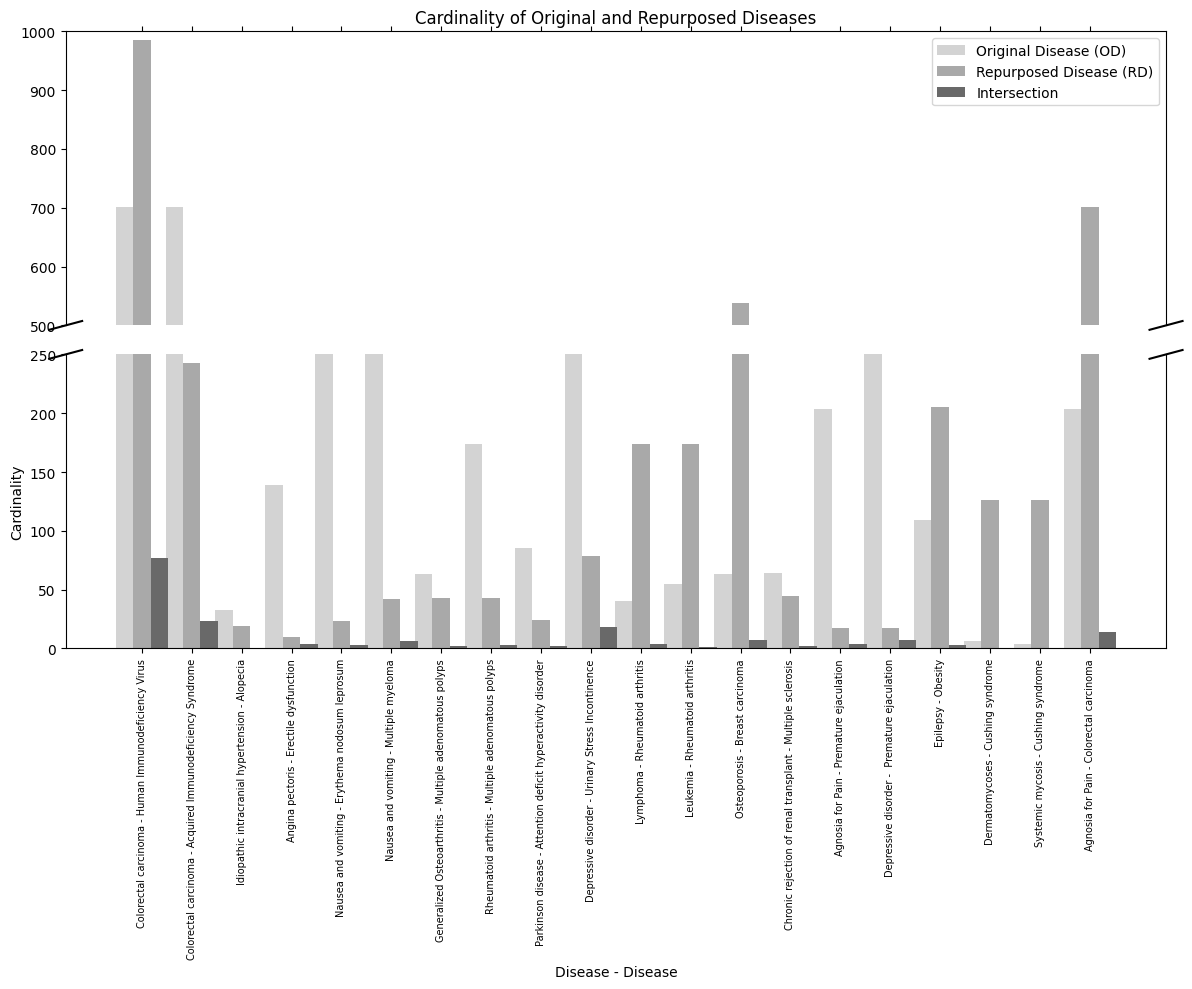

In [38]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

bar_width = 0.35
index = range(len(results_df))

# Definizione dei colori
colors = ['#D3D3D3', '#A9A9A9', '#696969']

# Barre sul primo subplot
ax.bar(index, results_df['OD'], bar_width, label='Original Disease (OD)', color=colors[0])
ax.bar([i + bar_width for i in index], results_df['RD'], bar_width, label='Repurposed Disease (RD)', color=colors[1])
ax.bar([i + bar_width * 2 for i in index], results_df['Cardinality intersection'], bar_width, label='Intersection', color=colors[2])

# Barre sul secondo subplot
ax2.bar(index, results_df['OD'], bar_width, color=colors[0])
ax2.bar([i + bar_width for i in index], results_df['RD'], bar_width, color=colors[1])
ax2.bar([i + bar_width * 2 for i in index], results_df['Cardinality intersection'], bar_width, color=colors[2])

# Limiti degli assi
ax.set_ylim([500, 1000])  # Limiti per il subplot superiore
ax2.set_ylim([0, 250])     # Limiti per il subplot inferiore

# Limiti per il subplot inferiore
# Rimozione delle spine
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Tick params
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Separazione visiva
d = .015  # Proporzione della rottura
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Etichette e titolo
ax2.set_xlabel('Disease - Disease')
ax2.set_ylabel('Cardinality')
ax.set_title('Cardinality of Original and Repurposed Diseases')
ax2.set_xticks([i + bar_width for i in index])
ax2.set_xticklabels(results_df['Disease - Disease'], rotation=90, fontsize=7)

# Legenda
ax.legend()

plt.tight_layout()
plt.show()


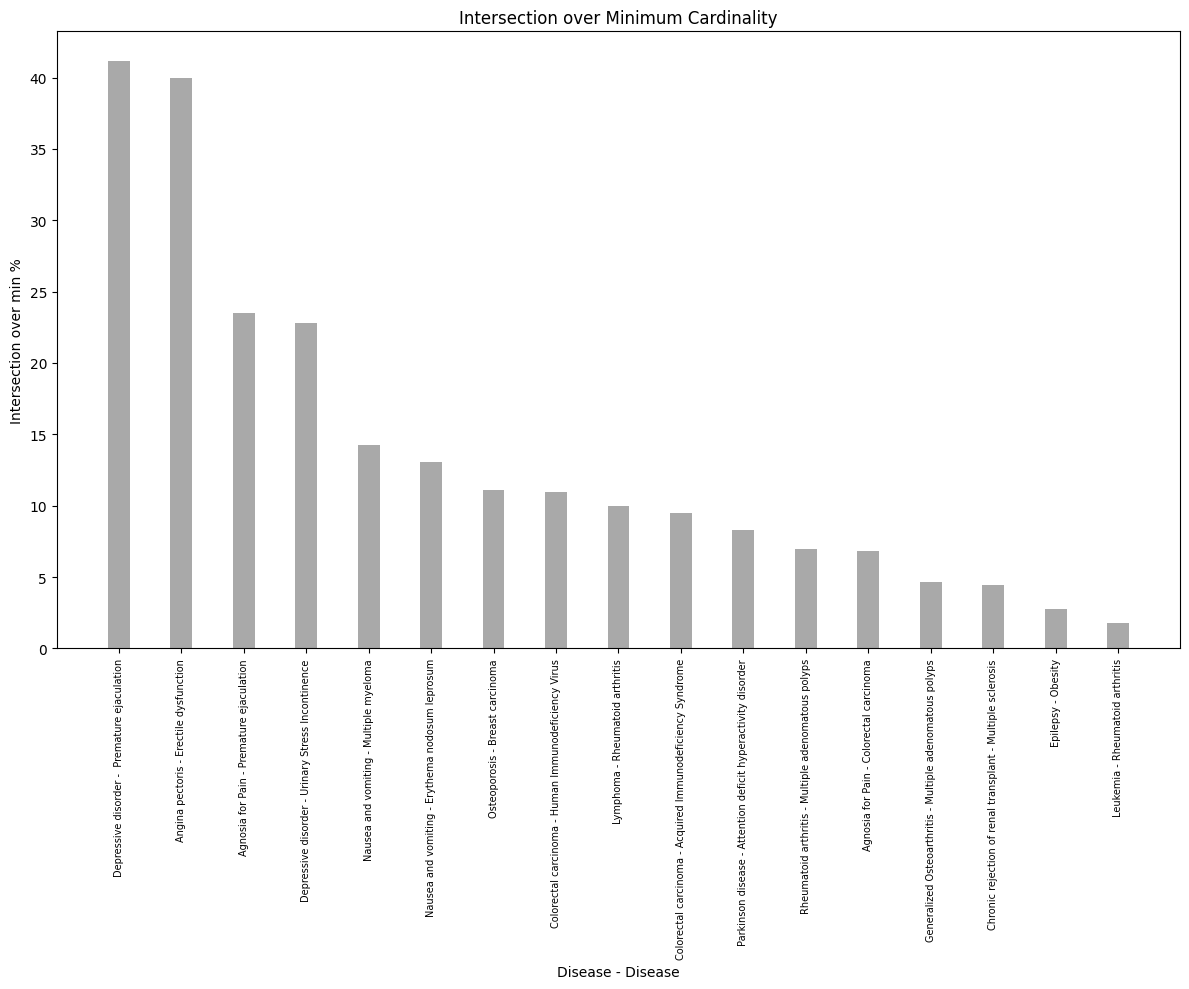

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtra i dati per eliminare le voci con 0%
results_df = results_df[results_df['Intersection over min %'] > 0]

# Prepara i dati
drug_labels = results_df['Disease - Disease']
values = results_df['Intersection over min %']


# Sorting the DataFrame by 'Intersection over min %' in descending order and reset the index
sorted_df = results_df.sort_values('Intersection over min %', ascending=False).reset_index(drop=True)

# Setting up the plot dimensions and bars width
fig, ax = plt.subplots(figsize=(12, 10))
bar_width = 0.35
index = range(len(sorted_df))  # Updated index for sorted DataFrame
colors = ['#A9A9A9']

# Creating the bar plot
bars = plt.bar(index, sorted_df['Intersection over min %'], width=bar_width, label='Intersection over min %', color=colors)

# Setting labels and title
plt.xlabel('Disease - Disease')
plt.ylabel('Intersection over min %')
plt.title('Intersection over Minimum Cardinality')
plt.xticks(index, sorted_df['Disease - Disease'], rotation=90, fontsize=7)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

## Caridnalities, intersections and graphs DRUG-DISEASE


In [40]:
import pandas as pd

# Funzione per calcolare le cardinalità e le intersezioni per le interazioni farmaco-malattia
def card_and_int_drug_disease(drug_genes, disease_genes):
    drug_set = set(drug_genes)
    cardinality_drug = len(drug_set)

    disease_set = set(disease_genes)
    cardinality_disease = len(disease_set)
    
    intersection_set = drug_set.intersection(disease_set)
    cardinality_intersection = len(intersection_set)
    
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_drug, cardinality_disease) if min(cardinality_drug, cardinality_disease) != 0 else 0

    return pd.Series([cardinality_drug, cardinality_disease, cardinality_intersection, intersection_over_min_ratio, list(drug_set)])

# Lista delle malattie e dei farmaci con i relativi geni
interactions = [
    {
        'drug': 'Zidovudine',
        'OD_RD_pairs': [
            ('Colorectal carcinoma', colorectal_carcinoma_CURATED.Gene),
            ('Human Immunodeficiency Virus', human_immunodeficiency_virus_unfiltered.Gene),
            ('Acquired Immunodeficiency Syndrome', acquired_immunodeficiency_syndrome_unfiltered.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'ZIDOVUDINE']['gene']
    },
    {
        'drug': 'Minoxidil',
        'OD_RD_pairs': [
            ('Idiopathic intracranial hypertension', idiopathic_intracranial_hypertension_unfiltered.Gene),
            ('Alopecia', alopecia_curated.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'MINOXIDIL']['gene']
    },
    {
        'drug': 'Sildenafil',
        'OD_RD_pairs': [
            ('Angina pectoris', angina_pectoris_unfiltered.Gene),
            ('Erectile dysfunction', erectile_dysfunction_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'SILDENAFIL']['gene']
    },
    {
        'drug': 'Thalidomide',
        'OD_RD_pairs': [
            ('Nausea and vomiting', nausea_vomiting_unfiltered.Gene),
            ('Erythema nodosum leprosum', erythema_nodosum_leprosum_unfiltered.Gene),
            ('Multiple myeloma', multiple_myeloma_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'THALIDOMIDE']['gene']
    },
    {
        'drug': 'Celecoxib',
        'OD_RD_pairs': [
            ('Generalized Osteoarthritis', generalized_osteoarthritis_unfiltered.Gene),
            ('Rheumatoid arthritis', rheumatoid_arthritis_CURATED.Gene),
            ('Multiple adenomatous polyps', multiple_adenomatous_polyps_unfiltered.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'CELECOXIB']['gene']
    },
    {
        'drug': 'Atomoxetine',
        'OD_RD_pairs': [
            ('Parkinson disease', parkinson_disease_CURATED.Gene),
            ('Attention deficit hyperactivity disorder', attention_deficit_hyperactivity_disorder_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'ATOMOXETINE']['gene']
    },
    {
        'drug': 'Duloxetine',
        'OD_RD_pairs': [
            ('Depressive disorder', depressive_disorder_CURATED.Gene),
            ('Urinary Stress Incontinence', urinary_stress_incontinence_unfiltered.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'DULOXETINE HYDROCHLORIDE']['gene']
    },
    {
        'drug': 'Rituximab',
        'OD_RD_pairs': [
            ('Lymphoma', lymphoma_CURATED.Gene),
            ('Leukemia', leukemia_CURATED.Gene),
            ('Rheumatoid arthritis', rheumatoid_arthritis_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'RITUXIMAB']['gene']
    },
    {
        'drug': 'Raloxifene',
        'OD_RD_pairs': [
            ('Osteoporosis', osteoporosis_CURATED.Gene),
            ('Breast carcinoma', breast_carcinoma_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'RALOXIFENE HYDROCHLORIDE']['gene']
    },
    {
        'drug': 'Fingolimod',
        'OD_RD_pairs': [
            ('Chronic rejection of renal transplant', chronic_rejection_renal_transplant_unfiltered.Gene),
            ('Multiple sclerosis', multiple_sclerosis_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'FINGOLIMOD']['gene']
    },
    {
        'drug': 'Dapoxetine',
        'OD_RD_pairs': [
            ('Agnosia for Pain', agnosia_for_pain_unfiltered.Gene),
            ('Depressive disorder', depressive_disorder_CURATED.Gene),
            ('Premature ejaculation', premature_ejaculation_unfiltered.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'DAPOXETINE']['gene']
    },
    {
        'drug': 'Topiramate',
        'OD_RD_pairs': [
            ('Epilepsy', epilepsy_CURATED.Gene),
            ('Obesity', obesity_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'TOPIRAMATE']['gene']
    },
    {
        'drug': 'Ketoconazole',
        'OD_RD_pairs': [
            ('Dermatomycoses', dermatomycoses_unfiltered.Gene),
            ('Systemic mycosis', systemic_mycosis_unfiltered.Gene),
            ('Cushing syndrome', cushing_syndrome_unfiltered.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'KETOCONAZOLE']['gene']
    },
    {
        'drug': 'Aspirin',
        'OD_RD_pairs': [
            ('Agnosia for Pain', agnosia_for_pain_unfiltered.Gene),
            ('Colorectal carcinoma', colorectal_carcinoma_CURATED.Gene)
        ],
        'drug_genes': drug_gene_assocation[drug_gene_assocation['drug'] == 'ASPIRIN']['gene']
    }
]

# Creazione del DataFrame per i risultati
results = []

for interaction in interactions:
    drug = interaction['drug']
    drug_genes = interaction['drug_genes']
    od_rd_pairs = interaction['OD_RD_pairs']

    for disease, disease_genes in od_rd_pairs:
        cardinality_drug, cardinality_disease, cardinality_intersection, intersection_ratio, drug_genes_list = card_and_int_drug_disease(drug_genes, disease_genes)
        
        results.append([
            f"{drug} - {disease}", 
            cardinality_drug, 
            cardinality_disease,
            cardinality_intersection, 
            intersection_ratio * 100,
            ', '.join(drug_genes_list)
        ])

columns = [
    'Drug_Disease', 
    'T Cardinality', 
    'Disease Cardinality',
    'Cardinality Intersection', 
    'Intersection Over Min Ratio %', 
    'T Genes'
]

results_df_2 = pd.DataFrame(results, columns=columns)

# Salva il DataFrame in un file Excel
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Drug_Disease_Summary.xlsx"
results_df_2.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
results_df_2


,Drug_Disease,T Cardinality,Disease Cardinality,Cardinality Intersection,Intersection Over Min Ratio %,T Genes
0,Zidovudine - Colorectal carcinoma,28,702,8,28.571429,"SLC22A11, SLC22A7, SLC22A8, CYP2E1, NME1, ABCB..."
1,Zidovudine - Human Immunodeficiency Virus,28,985,10,35.714286,"SLC22A11, SLC22A7, SLC22A8, CYP2E1, NME1, ABCB..."
2,Zidovudine - Acquired Immunodeficiency Syndrome,28,243,4,14.285714,"SLC22A11, SLC22A7, SLC22A8, CYP2E1, NME1, ABCB..."
3,Minoxidil - Idiopathic intracranial hypertension,10,33,0,0.000000,"SULT1A1, KCNJ1, CYP1A2, KCNJ11, CYP2D6, CYP3A4..."
4,Minoxidil - Alopecia,10,19,0,0.000000,"SULT1A1, KCNJ1, CYP1A2, KCNJ11, CYP2D6, CYP3A4..."
5,Sildenafil - Angina pectoris,7,139,4,57.142857,"GNB3, VEGFA, NOS3, ARG1, CYP3A4, PDE5A, ACE"
6,Sildenafil - Erectile dysfunction,7,10,2,28.571429,"GNB3, VEGFA, NOS3, ARG1, CYP3A4, PDE5A, ACE"
7,Thalidomide - Nausea and vomiting,37,257,5,13.513514,"PPARD, CHST3, GSTT1, NFKB1, MECOM, CYP4B1, DDB..."
8,Thalidomide - Erythema nodosum leprosum,37,23,1,4.347826,"PPARD, CHST3, GSTT1, NFKB1, MECOM, CYP4B1, DDB..."
9,Thalidomide - Multiple myeloma,37,42,2,5.405405,"PPARD, CHST3, GSTT1, NFKB1, MECOM, CYP4B1, DDB..."


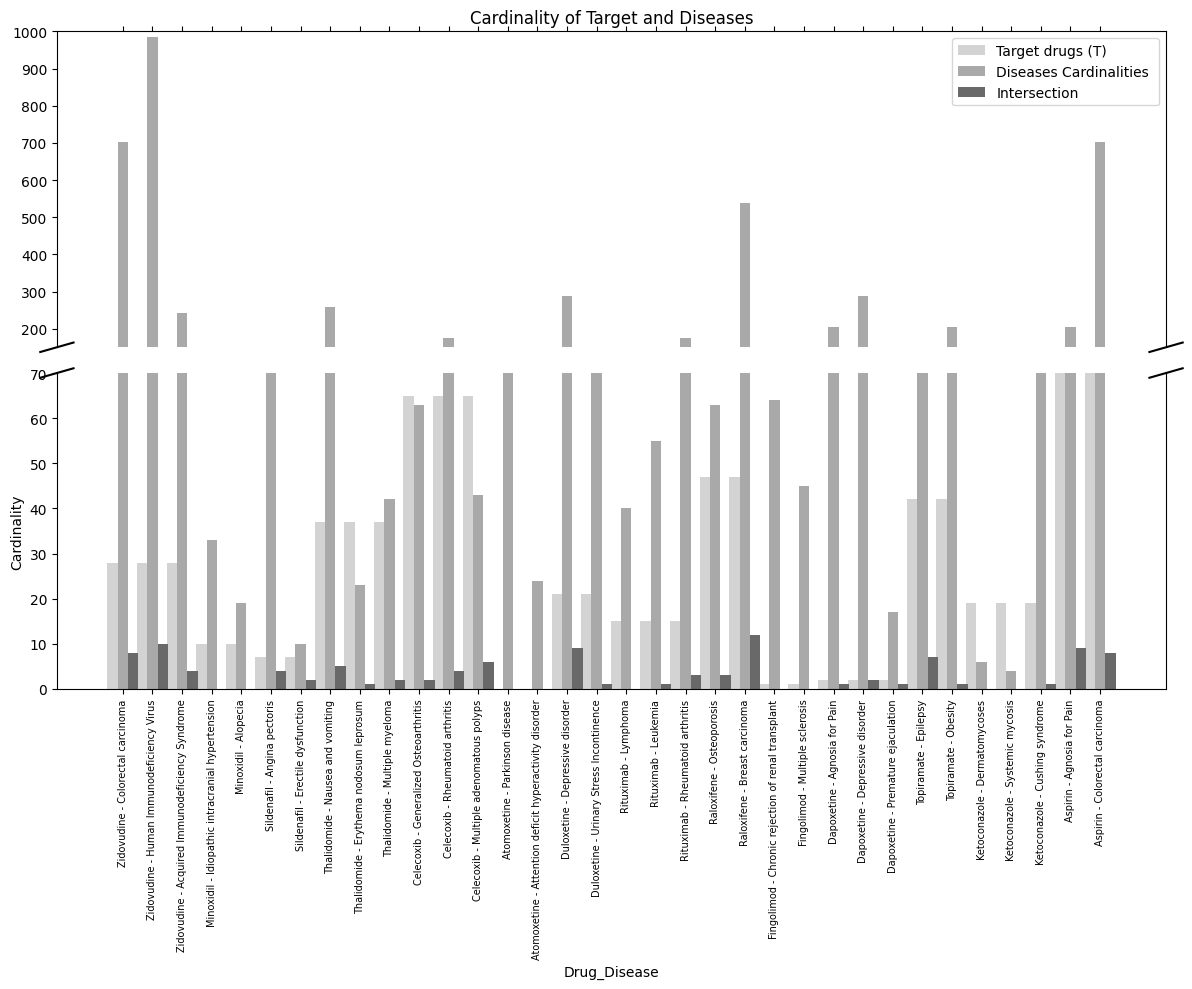

In [41]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

bar_width = 0.35
index = range(len(results_df_2))

# Definizione dei colori
colors = ['#D3D3D3', '#A9A9A9', '#696969']

# Barre sul primo subplot
ax.bar(index, results_df_2['T Cardinality'], bar_width, label='Target drugs (T)', color=colors[0])
ax.bar([i + bar_width for i in index], results_df_2['Disease Cardinality'], bar_width, label='Diseases Cardinalities ', color=colors[1])
ax.bar([i + bar_width * 2 for i in index], results_df_2['Cardinality Intersection'], bar_width, label='Intersection', color=colors[2])

# Barre sul secondo subplot
ax2.bar(index, results_df_2['T Cardinality'], bar_width, color=colors[0])
ax2.bar([i + bar_width for i in index], results_df_2['Disease Cardinality'], bar_width, color=colors[1])
ax2.bar([i + bar_width * 2 for i in index], results_df_2['Cardinality Intersection'], bar_width, color=colors[2])

# Limiti degli assi
ax.set_ylim([150, 1000])  # Limiti per il subplot superiore
ax2.set_ylim([0, 70])     # Limiti per il subplot inferiore

# Limiti per il subplot inferiore
# Rimozione delle spine
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Tick params
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Separazione visiva
d = .015  # Proporzione della rottura
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Etichette e titolo
ax2.set_xlabel('Drug_Disease')
ax2.set_ylabel('Cardinality')
ax.set_title('Cardinality of Target and Diseases')
ax2.set_xticks([i + bar_width for i in index])
ax2.set_xticklabels(results_df_2['Drug_Disease'], rotation=90, fontsize=7)

# Legenda
ax.legend()

plt.tight_layout()
plt.show()


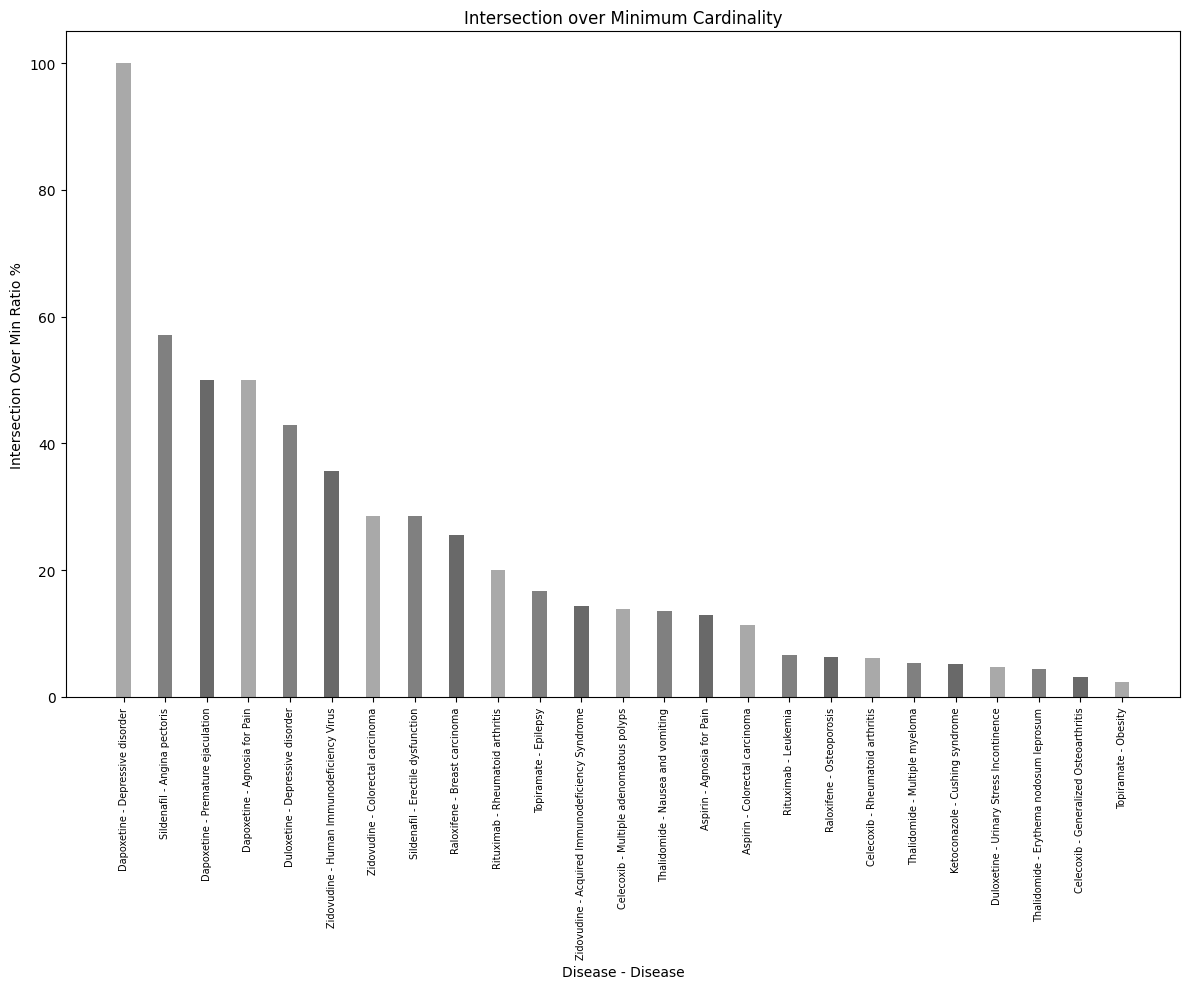

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Supponiamo che results_df_2 sia già stato caricato correttamente
# Filtra i dati per eliminare le voci con 0%
filtered_df = results_df_2[results_df_2['Intersection Over Min Ratio %'] > 0]

# Prepara i dati
drug_labels = filtered_df['Drug_Disease']
values = filtered_df['Intersection Over Min Ratio %']
colors = ['#A9A9A9', '#808080', '#696969'] 

# Sorting the DataFrame by 'Intersection Over Min Ratio %' in descending order and reset the index
sorted_df_2 = filtered_df.sort_values('Intersection Over Min Ratio %', ascending=False).reset_index(drop=True)

# Setting up the plot dimensions and bars width
fig, ax = plt.subplots(figsize=(12, 10))
bar_width = 0.35
index = range(len(sorted_df_2))  # Updated index for sorted DataFrame

# Creating the bar plot
bars = plt.bar(index, sorted_df_2['Intersection Over Min Ratio %'], width=bar_width, label='Intersection Over Min Ratio %', color=colors)

# Setting labels and title
plt.xlabel('Disease - Disease')
plt.ylabel('Intersection Over Min Ratio %')
plt.title('Intersection over Minimum Cardinality')
plt.xticks(index, sorted_df_2['Drug_Disease'], rotation=90, fontsize=7)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


# Functional analysis

In [43]:
import gseapy as gp
import pandas as pd

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

In [47]:
# Set di dati per EnrichR
gene_sets = ['KEGG_2021_Human', 'Reactome_2022', 'GO_Biological_Process_2021', 'GO_Molecular_Function_2021']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")
drug_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Drug_Disease_Summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)
disease_disease_df['OD U RD genes'] = disease_disease_df['OD U RD genes'].astype(str)
drug_disease_df['T Genes'] = drug_disease_df['T Genes'].astype(str)

# Lista dei geni target (T), original disease (OD), repurposed disease (RD) e unione (OD ∪ RD)
target_genes = drug_disease_df['T Genes'].apply(lambda x: x.split(', ')).explode().unique().tolist()
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).explode().unique().tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).explode().unique().tolist()
union_genes = disease_disease_df['OD U RD genes'].apply(lambda x: x.split(', ')).explode().unique().tolist()

# Analisi di arricchimento
terms_t, genes_t = enrichr_analysis(target_genes, gene_sets)
terms_od, genes_od = enrichr_analysis(od_genes, gene_sets)
terms_rd, genes_rd = enrichr_analysis(rd_genes, gene_sets)
terms_union, genes_union = enrichr_analysis(union_genes, gene_sets)



In [48]:
# Calcola le intersezioni per ogni database
results_intersections = []

for db in gene_sets:
    terms_t_db, genes_t_db = enrichr_analysis(target_genes, [db])
    terms_od_db, genes_od_db = enrichr_analysis(od_genes, [db])
    terms_rd_db, genes_rd_db = enrichr_analysis(rd_genes, [db])
    terms_union_db, genes_union_db = enrichr_analysis(union_genes, [db])
    
    # T ∩ OD
    inter_t_od, inter_t_od_terms, iom_t_od, inter_t_od_genes = calculate_intersections(terms_t_db, terms_od_db, genes_t_db, genes_od_db)
    
    # T ∩ RD
    inter_t_rd, inter_t_rd_terms, iom_t_rd, inter_t_rd_genes = calculate_intersections(terms_t_db, terms_rd_db, genes_t_db, genes_rd_db)
    
    # OD ∩ RD
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od_db, terms_rd_db, genes_od_db, genes_rd_db)
    
    results_intersections.append({
        'Database': db,
        'T ∩ OD': inter_t_od,
        'Terms T ∩ OD': ', '.join(inter_t_od_terms),
        'Intersection over min % T ∩ OD': iom_t_od,
        'Genes T ∩ OD': ', '.join(inter_t_od_genes),
        'T ∩ RD': inter_t_rd,
        'Terms T ∩ RD': ', '.join(inter_t_rd_terms),
        'Intersection over min % T ∩ RD': iom_t_rd,
        'Genes T ∩ RD': ', '.join(inter_t_rd_genes),
        'OD ∩ RD': inter_od_rd,
        'Terms OD ∩ RD': ', '.join(inter_od_rd_terms),
        'Intersection over min % OD ∩ RD': iom_od_rd,
        'Genes OD ∩ RD': ', '.join(inter_od_rd_genes)
    })

# Convert to DataFrame
enrichment_results = pd.DataFrame(results_intersections)

# Save the results to an Excel file
enrichment_results.to_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Functional_Enrichment_Intersections_Updated_2.xlsx", index=False)


In [49]:
enrichment_results

,Database,T ∩ OD,Terms T ∩ OD,Intersection over min % T ∩ OD,Genes T ∩ OD,T ∩ RD,Terms T ∩ RD,Intersection over min % T ∩ RD,Genes T ∩ RD,OD ∩ RD,Terms OD ∩ RD,Intersection over min % OD ∩ RD,Genes OD ∩ RD
0,KEGG_2021_Human,177,"NF-kappa B signaling pathway, Metabolism of xe...",0.946524,"IGFBP3, GSTT1, CXCL12, CDKN1B, STAT3, SCN2A, P...",175,"NF-kappa B signaling pathway, Metabolism of xe...",0.935829,"IGFBP3, GSTT1, MECOM, CXCL12, HLA-DQB1, CDKN1B...",211,"NF-kappa B signaling pathway, Metabolism of xe...",0.929515,"HLA-DQA2, ABCC8, LMNB2, HTR2C, KRAS, CXCL2, NT..."
1,Reactome_2022,162,Activation Of NMDA Receptors And Postsynaptic ...,0.680672,"CXCL12, NR1I2, LPA, PTGER4, F2R, ABCC6, GHRL, ...",174,Activation Of NMDA Receptors And Postsynaptic ...,0.731092,"IGFBP3, GSTT1, MECOM, CXCL12, CDKN1B, NR1I2, T...",448,FGFR1 Ligand Binding And Activation R-HSA-1902...,0.828096,"HLA-DQA2, ABCC8, LMNB2, HTR2C, NR1I2, CXCL2, N..."
2,GO_Biological_Process_2021,620,positive regulation of nuclear division (GO:00...,0.772105,"IGFBP3, CXCL12, CDKN1B, NR1I2, LPA, STAT3, PTG...",601,positive regulation of nuclear division (GO:00...,0.748443,"IGFBP3, MECOM, TERT, CDKN1B, HLA-DQB1, DDB1, C...",1536,positive regulation of nuclear division (GO:00...,0.770311,"HLA-DQA2, SDF4, ABCC8, NR1I2, HTR2C, KRAS, NTR..."
3,GO_Molecular_Function_2021,70,"interleukin-6 receptor binding (GO:0005138), t...",0.500000,"IGFBP3, CXCL12, NR1I2, CDKN1B, STAT3, SCN2A, G...",55,"interleukin-6 receptor binding (GO:0005138), t...",0.392857,"IGFBP3, CXCL12, NR1I2, TERT, CDKN1B, STAT3, AP...",113,transcription cis-regulatory region binding (G...,0.624309,"SDF4, NR1I2, KRAS, NTRK2, CXCL2, ZNF217, PAK6,..."


In [71]:
# As we expected, the percentage of the intesection over minimum cardinality is generally higer, except for the Molecular Function database between T and RD, that can be also beacause 
# the intersection between T and RD is 55, compared to the 70 od the T and OD intersection.
# The intersection between OD and RD is also higherm the minimun percetange is for the molecular function database.


# Second part Functional Anlaysis

In [ ]:
import pandas as pd
import networkx as nx
import openpyxl
import distance
import matplotlib.pyplot as plt
import gseapy as gp
from gseapy import Biomart
bm = Biomart()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import gseapy as gp
import numpy as np  
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler



# Kegg


In [ ]:
import pandas as pd
import gseapy as gp

# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set)])

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

# Set di dati per EnrichR
gene_sets = ['KEGG_2021_Human']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)

# Lista dei geni original disease (OD) e repurposed disease (RD)
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).tolist()

# Creazione del DataFrame per i risultati di KEGG_2021_Human
results_intersections_kegg = []

# Calcolo delle intersezioni per ogni coppia di malattie
for idx, row in disease_disease_df.iterrows():
    genes_od = row['genes OD'].split(', ')
    genes_rd = row['genes RD'].split(', ')
    
    terms_od, genes_od_dict = enrichr_analysis(genes_od, gene_sets)
    terms_rd, genes_rd_dict = enrichr_analysis(genes_rd, gene_sets)
    
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od, terms_rd, genes_od_dict, genes_rd_dict)
    
    results_intersections_kegg.append({
        'Disease - Disease': row['Disease - Disease'],
        'OD ∩ RD': inter_od_rd,
        'Intersection Terms OD ∩ RD': list(inter_od_rd_terms),
        'Intersection Genes OD ∩ RD': list(inter_od_rd_genes),
        'Intersection over min % OD ∩ RD': iom_od_rd * 100
    })

# Convert to DataFrame
enrichment_results_kegg = pd.DataFrame(results_intersections_kegg)

# Save the results to an Excel file
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/KEGG_2021_Human_Disease_Disease_Intersections.xlsx"
#enrichment_results_kegg.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
enrichment_results_kegg


## Reactome

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gseapy as gp

# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set)])

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

# Set di dati per EnrichR
gene_sets = ['Reactome_2022']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)


# Lista dei geni original disease (OD) e repurposed disease (RD)
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).tolist()

# Analisi di arricchimento per Reactome_2022
terms_od, genes_od = enrichr_analysis([gene for sublist in od_genes for gene in sublist], gene_sets)
terms_rd, genes_rd = enrichr_analysis([gene for sublist in rd_genes for gene in sublist], gene_sets)

# Creazione del DataFrame per i risultati di Reactome_2022
results_intersections_reactome = []

# Calcolo delle intersezioni per ogni coppia di malattie
for idx, row in disease_disease_df.iterrows():
    genes_od = row['genes OD'].split(', ')
    genes_rd = row['genes RD'].split(', ')
    
    terms_od, genes_od_dict = enrichr_analysis(genes_od, gene_sets)
    terms_rd, genes_rd_dict = enrichr_analysis(genes_rd, gene_sets)
    
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od, terms_rd, genes_od_dict, genes_rd_dict)
    
    results_intersections_reactome.append({
        'Disease - Disease': row['Disease - Disease'],
        'OD ∩ RD': inter_od_rd,
        'Intersection over min % OD ∩ RD': iom_od_rd * 100
    })

# Convert to DataFrame
enrichment_results_reactome = pd.DataFrame(results_intersections_reactome)

# Save the results to an Excel file
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/Reactome_2022_Disease_Disease_Intersections.xlsx"
enrichment_results_reactome.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
enrichment_results_reactome

## Biological Process

In [ ]:
# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set)])

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

# Set di dati per EnrichR
gene_sets = ['GO_Biological_Process_2021']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)



# Lista dei geni original disease (OD) e repurposed disease (RD)
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).tolist()

# Analisi di arricchimento per GO_Biological_Process_2021
terms_od, genes_od = enrichr_analysis([gene for sublist in od_genes for gene in sublist], gene_sets)
terms_rd, genes_rd = enrichr_analysis([gene for sublist in rd_genes for gene in sublist], gene_sets)

# Creazione del DataFrame per i risultati di GO_Biological_Process_2021
results_intersections_bp= []

# Calcolo delle intersezioni per ogni coppia di malattie
for idx, row in disease_disease_df.iterrows():
    genes_od = row['genes OD'].split(', ')
    genes_rd = row['genes RD'].split(', ')
    
    terms_od, genes_od_dict = enrichr_analysis(genes_od, gene_sets)
    terms_rd, genes_rd_dict = enrichr_analysis(genes_rd, gene_sets)
    
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od, terms_rd, genes_od_dict, genes_rd_dict)
    
    results_intersections_bp.append({
        'Disease - Disease': row['Disease - Disease'],
        'OD ∩ RD': inter_od_rd,
        'Intersection over min % OD ∩ RD': iom_od_rd * 100
    })

# Convert to DataFrame
enrichment_results_bp = pd.DataFrame(results_intersections_bp)

# Save the results to an Excel file
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Biological_Process_2021_Disease_Disease_Intersections.xlsx"
enrichment_results_bp.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
enrichment_results_bp

## Molecular Function

In [ ]:
# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set)])

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

# Set di dati per EnrichR
gene_sets = ['GO_Molecular_Function_2021']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)



# Lista dei geni original disease (OD) e repurposed disease (RD)
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).tolist()

# Analisi di arricchimento per GO_Biological_Process_2021
terms_od, genes_od = enrichr_analysis([gene for sublist in od_genes for gene in sublist], gene_sets)
terms_rd, genes_rd = enrichr_analysis([gene for sublist in rd_genes for gene in sublist], gene_sets)

# Creazione del DataFrame per i risultati di GO_Biological_Process_2021
results_intersections_mf= []

# Calcolo delle intersezioni per ogni coppia di malattie
for idx, row in disease_disease_df.iterrows():
    genes_od = row['genes OD'].split(', ')
    genes_rd = row['genes RD'].split(', ')
    
    terms_od, genes_od_dict = enrichr_analysis(genes_od, gene_sets)
    terms_rd, genes_rd_dict = enrichr_analysis(genes_rd, gene_sets)
    
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od, terms_rd, genes_od_dict, genes_rd_dict)
    
    results_intersections_mf.append({
        'Disease - Disease': row['Disease - Disease'],
        'OD ∩ RD': inter_od_rd,
        'Intersection over min % OD ∩ RD': iom_od_rd * 100
    })

# Convert to DataFrame
enrichment_results_mf = pd.DataFrame(results_intersections_mf)

# Save the results to an Excel file
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Molecular_Function_2021_Disease_Disease_Intersections.xlsx"
enrichment_results_mf.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
enrichment_results_mf

,Disease - Disease,OD ∩ RD,Intersection over min % OD ∩ RD
0,Colorectal carcinoma - Human Immunodeficiency ...,12,22.222222
1,Colorectal carcinoma - Acquired Immunodeficien...,6,11.111111
2,Idiopathic intracranial hypertension - Alopecia,0,0.000000
3,Angina pectoris - Erectile dysfunction,13,38.235294
4,Nausea and vomiting - Erythema nodosum leprosum,4,20.000000
5,Nausea and vomiting - Multiple myeloma,3,30.000000
6,Generalized Osteoarthritis - Multiple adenomat...,1,6.250000
7,Rheumatoid arthritis - Multiple adenomatous po...,4,25.000000
8,Parkinson disease - Attention deficit hyperact...,3,10.714286
9,Depressive disorder - Urinary Stress Incontinence,30,48.387097


# Cellular Component

In [ ]:
# Funzione per calcolare le cardinalità e le intersezioni
def card_and_int_disease_disease(original_genes, proposed_genes):
    original_set = set(original_genes)
    proposed_set = set(proposed_genes)
    cardinality_original = len(original_set)
    cardinality_proposed = len(proposed_set)
    intersection_set = original_set.intersection(proposed_set)
    cardinality_intersection = len(intersection_set)
    intersection_over_min_ratio = cardinality_intersection / min(cardinality_original, cardinality_proposed) if min(cardinality_original, cardinality_proposed) != 0 else 0
    
    
    return pd.Series([cardinality_original, cardinality_proposed, list(intersection_set), cardinality_intersection, intersection_over_min_ratio, list(original_set), list(proposed_set)])

# Funzione per l'analisi di arricchimento
def enrichr_analysis(gene_list, gene_sets, organism='Human'):
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism)
    enriched_terms = enr.results[enr.results['Adjusted P-value'] < 0.05]
    terms_genes = {}
    for _, row in enriched_terms.iterrows():
        terms_genes[row['Term']] = row['Genes'].split(';')
    return list(terms_genes.keys()), terms_genes

# Funzione per calcolare le intersezioni
def calculate_intersections(terms1, terms2, genes1, genes2):
    set1 = set(terms1)
    set2 = set(terms2)
    intersection_terms = set1.intersection(set2)
    min_cardinality_terms = min(len(set1), len(set2))
    intersection_over_min_terms = len(intersection_terms) / min_cardinality_terms if min_cardinality_terms != 0 else 0
    
    intersection_genes = set()
    for term in intersection_terms:
        genes_intersection = set(genes1[term]).intersection(set(genes2[term]))
        intersection_genes.update(genes_intersection)
    
    return len(intersection_terms), intersection_terms, intersection_over_min_terms, list(intersection_genes)

# Set di dati per EnrichR
gene_sets = ['GO_Cellular_Component_2021']

# Carica i dati dai file Excel
disease_disease_df = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Converto tutti i valori delle colonne dei geni in stringhe
disease_disease_df['genes OD'] = disease_disease_df['genes OD'].astype(str)
disease_disease_df['genes RD'] = disease_disease_df['genes RD'].astype(str)


# Lista dei geni original disease (OD) e repurposed disease (RD)
od_genes = disease_disease_df['genes OD'].apply(lambda x: x.split(', ')).tolist()
rd_genes = disease_disease_df['genes RD'].apply(lambda x: x.split(', ')).tolist()

# Analisi di arricchimento per GO_Biological_Process_2021
terms_od, genes_od = enrichr_analysis([gene for sublist in od_genes for gene in sublist], gene_sets)
terms_rd, genes_rd = enrichr_analysis([gene for sublist in rd_genes for gene in sublist], gene_sets)

# Creazione del DataFrame per i risultati di GO_Biological_Process_2021
results_intersections_cc = []

# Calcolo delle intersezioni per ogni coppia di malattie
for idx, row in disease_disease_df.iterrows():
    genes_od = row['genes OD'].split(', ')
    genes_rd = row['genes RD'].split(', ')
    
    terms_od, genes_od_dict = enrichr_analysis(genes_od, gene_sets)
    terms_rd, genes_rd_dict = enrichr_analysis(genes_rd, gene_sets)
    
    inter_od_rd, inter_od_rd_terms, iom_od_rd, inter_od_rd_genes = calculate_intersections(terms_od, terms_rd, genes_od_dict, genes_rd_dict)
    
    results_intersections_cc.append({
        'Disease - Disease': row['Disease - Disease'],
        'OD ∩ RD': inter_od_rd,
        'Intersection over min % OD ∩ RD': iom_od_rd * 100
    })

# Convert to DataFrame
enrichment_results_cc = pd.DataFrame(results_intersections_cc)

# Save the results to an Excel file
output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Cellular_Component_Disease_Disease_Intersections.xlsx"
enrichment_results_cc.to_excel(output_file_path, index=False)

# Visualizza il DataFrame
enrichment_results_cc

# Topological analysis

1. Create a dataframe for each pairs of original-repurposed diseases
2. Create a dictionary to map diseases to their associated genes
3. Filter the disease genes to those present in the PPI network
4. Compute d<A,B>, d<A,A> and d<B,B>
5. Compute s_AB

Step 1: Create a df for each pair

In [50]:
# Pair: Colorectal carcinoma - Human Immunodeficiency Virus
df1 = pd.concat([colorectal_carcinoma_CURATED, human_immunodeficiency_virus_unfiltered])

# Pair: Colorectal carcinoma - Acquired Immunodeficiency Syndrome
df2 = pd.concat([colorectal_carcinoma_CURATED, acquired_immunodeficiency_syndrome_unfiltered])

# Pair: Idiopathic intracranial hypertension - Alopecia
df3 = pd.concat([idiopathic_intracranial_hypertension_unfiltered, alopecia_curated])

# Pair: Angina pectoris - Erectile dysfunction
df4 = pd.concat([angina_pectoris_unfiltered, erectile_dysfunction_CURATED])

# Pair: Nausea and vomiting - Erythema nodosum leprosum
df5 = pd.concat([nausea_vomiting_unfiltered, erythema_nodosum_leprosum_unfiltered])

# Pair: Nausea and vomiting - Multiple myeloma
df6 = pd.concat([nausea_vomiting_unfiltered, multiple_myeloma_CURATED])

# Pair: Generalized Osteoarthritis - Multiple adenomatous polyps
df7 = pd.concat([generalized_osteoarthritis_unfiltered, multiple_adenomatous_polyps_unfiltered])

# Pair: Rheumatoid arthritis - Multiple adenomatous polyps
df8 = pd.concat([rheumatoid_arthritis_CURATED, multiple_adenomatous_polyps_unfiltered])

# Pair: Parkinson disease - Attention deficit hyperactivity disorder
df9 = pd.concat([parkinson_disease_CURATED, attention_deficit_hyperactivity_disorder_CURATED])

# Pair: Depressive disorder - Urinary Stress Incontinence
df10 = pd.concat([depressive_disorder_CURATED, urinary_stress_incontinence_unfiltered])

# Pair: Lymphoma - Rheumatoid arthritis
df11 = pd.concat([lymphoma_CURATED, rheumatoid_arthritis_CURATED])

# Pair: Leukemia - Rheumatoid arthritis
df12 = pd.concat([leukemia_CURATED, rheumatoid_arthritis_CURATED])

# Pair: Osteoporosis - Breast carcinoma
df13 = pd.concat([osteoporosis_CURATED, breast_carcinoma_CURATED])

# Pair: Chronic rejection of renal transplant - Multiple sclerosis
df14 = pd.concat([chronic_rejection_renal_transplant_unfiltered, multiple_sclerosis_CURATED])

# Pair: Agnosia for Pain - Premature ejaculation
df15 = pd.concat([agnosia_for_pain_unfiltered, premature_ejaculation_unfiltered])

# Pair: Depressive disorder - Premature ejaculation
df16 = pd.concat([depressive_disorder_CURATED, premature_ejaculation_unfiltered])

# Pair: Epilepsy - Obesity
df17 = pd.concat([epilepsy_CURATED, obesity_CURATED])

# Pair: Dermatomycoses - Cushing syndrome
df18 = pd.concat([dermatomycoses_unfiltered, cushing_syndrome_unfiltered])

# Pair: Systemic mycosis - Cushing syndrome
df19 = pd.concat([systemic_mycosis_unfiltered, cushing_syndrome_unfiltered])

# Pair: Agnosia for Pain - Colorectal carcinoma
df20 = pd.concat([agnosia_for_pain_unfiltered, colorectal_carcinoma_CURATED])

In [51]:
# Compute d<A,B>
def average_shortest_path_length_between_sets(genes1, genes2, graph):
    total_distance = 0
    count = 0
    for gene1 in genes1:
        for gene2 in genes2:
            if gene1 != gene2 and nx.has_path(graph, gene1, gene2):
                total_distance += nx.shortest_path_length(graph, gene1, gene2)
                count += 1
    return total_distance / count if count > 0 else float('inf')
# Compute d<A,A> and d<B,B>
def average_shortest_path_length_within_set(genes, graph):
    total_distance = 0
    count = 0
    for i in range(len(genes)):
        for j in range(i + 1, len(genes)):
            if nx.has_path(graph, genes[i], genes[j]):
                total_distance += nx.shortest_path_length(graph, genes[i], genes[j])
                count += 1
    return total_distance / count if count > 0 else float('inf')

def compute_s_AB(genes1, genes2, graph):
    d_AB = average_shortest_path_length_between_sets(genes1, genes2, graph)
    d_AA = average_shortest_path_length_within_set(genes1, graph)
    d_BB = average_shortest_path_length_within_set(genes2, graph)
    return d_AB - ((d_AA + d_BB) / 2)

In [52]:
# Compute s_AB measure projecting in ppi_network
processed_pairs = set()
distances_ppi = {}
for i in range(1, 21):
    df = globals()[f'df{i}']  # Access each DataFrame dynamically using globals()
    disease_to_genes = df.groupby('Disease')['Gene'].apply(list).to_dict()
    filtered_disease_to_genes = {disease: [gene for gene in genes if gene in ppi_network]
                                  for disease, genes in disease_to_genes.items()}

    # Compute distances (s_AB) for each pair of diseases
    diseases = list(filtered_disease_to_genes.keys())
    for j, disease1 in enumerate(diseases):
        for disease2 in diseases[j+1:]:
            # Ensure disease pairs are processed only once
            pair_key = (disease1, disease2)
            if pair_key not in processed_pairs:
                genes1 = filtered_disease_to_genes[disease1]
                genes2 = filtered_disease_to_genes[disease2]
                s_AB = compute_s_AB(genes1, genes2, ppi_network)

                # Store the result in the distances dictionary
                distances_ppi[pair_key] = s_AB
                processed_pairs.add(pair_key)  # Mark pair as processed

In [53]:
for key, s_AB in distances_ppi.items():
    print(f's_AB projected in PPI for {key}: {s_AB}')

s_AB projected in PPI for ('Colorectal Carcinoma', 'Human immunodeficiency virus (HIV) II infection category B1'): 0.00642374957263403
s_AB projected in PPI for ('Acquired Immunodeficiency Syndrome', 'Colorectal Carcinoma'): 0.01204272337811041
s_AB projected in PPI for ('Alopecia', 'Pseudotumor Cerebri'): 0.029551811016341745
s_AB projected in PPI for ('Angina Pectoris', 'Erectile dysfunction'): 0.050202927204713976
s_AB projected in PPI for ('Erythema nodosum leprosum', 'Nausea and vomiting'): 0.04995600724199978
s_AB projected in PPI for ('Multiple Myeloma', 'Nausea and vomiting'): 0.006508837858382854
s_AB projected in PPI for ('Generalized osteoarthritis', 'Multiple adenomatous polyps'): 0.025461891136402848
s_AB projected in PPI for ('Multiple adenomatous polyps', 'Rheumatoid Arthritis'): 0.026393027903783395
s_AB projected in PPI for ('Attention deficit hyperactivity disorder', 'Parkinson Disease'): 0.01884518938942481
s_AB projected in PPI for ('Depressive disorder', 'Urinary S

In [55]:
# Compute s_AB measure projecting in fi_network
processed_pairs = set()
distances_fi = {}
for i in range(1, 21):
    df = globals()[f'df{i}']  # Access each DataFrame dynamically using globals()
    disease_to_genes = df.groupby('Disease')['Gene'].apply(list).to_dict()
    filtered_disease_to_genes = {disease: [gene for gene in genes if gene in fi_network]
                                  for disease, genes in disease_to_genes.items()}

    # Compute distances (s_AB) for each pair of diseases
    diseases = list(filtered_disease_to_genes.keys())
    for j, disease1 in enumerate(diseases):
        for disease2 in diseases[j+1:]:
            # Ensure disease pairs are processed only once
            pair_key = (disease1, disease2)
            if pair_key not in processed_pairs:
                genes1 = filtered_disease_to_genes[disease1]
                genes2 = filtered_disease_to_genes[disease2]
                s_AB = compute_s_AB(genes1, genes2, fi_network)

                # Store the result in the distances dictionary
                distances_fi[pair_key] = s_AB
                processed_pairs.add(pair_key)  # Mark pair as processed

In [56]:
for key, s_AB in distances_fi.items():
    print(f's_AB projected in FI for {key}: {s_AB}')

s_AB projected in FI for ('Colorectal Carcinoma', 'Human immunodeficiency virus (HIV) II infection category B1'): 0.021786946847661692
s_AB projected in FI for ('Acquired Immunodeficiency Syndrome', 'Colorectal Carcinoma'): 0.0382127535892165
s_AB projected in FI for ('Alopecia', 'Pseudotumor Cerebri'): -0.09876543209876543
s_AB projected in FI for ('Angina Pectoris', 'Erectile dysfunction'): 0.0957655628688796
s_AB projected in FI for ('Erythema nodosum leprosum', 'Nausea and vomiting'): 0.07630736252139281
s_AB projected in FI for ('Multiple Myeloma', 'Nausea and vomiting'): 0.039210676596176164
s_AB projected in FI for ('Generalized osteoarthritis', 'Multiple adenomatous polyps'): 0.04053609600908059
s_AB projected in FI for ('Multiple adenomatous polyps', 'Rheumatoid Arthritis'): 0.06407472849314955
s_AB projected in FI for ('Attention deficit hyperactivity disorder', 'Parkinson Disease'): 0.1907204049694422
s_AB projected in FI for ('Depressive disorder', 'Urinary Stress Incontine

In [57]:
# Create data list for the PPI DataFrame
data_ppi = [(key[0], key[1], s_AB) for key, s_AB in distances_ppi.items()]

# Create a DataFrame for PPI distances
df_ppi = pd.DataFrame(data_ppi, columns=['Disease 1', 'Disease 2', 's_AB in PPI'])

# Create data list for the FI DataFrame
data_fi = [(key[0], key[1], s_AB) for key, s_AB in distances_fi.items()]

# Create a DataFrame for FI distances
df_fi = pd.DataFrame(data_fi, columns=['Disease 1', 'Disease 2', 's_AB in FI'])

# Merge the two DataFrames on 'Disease 1' and 'Disease 2' columns
df = pd.merge(df_ppi, df_fi, on=['Disease 1', 'Disease 2'])

In [58]:
df

,Disease 1,Disease 2,s_AB in PPI,s_AB in FI
0,Colorectal Carcinoma,Human immunodeficiency virus (HIV) II infectio...,0.006424,0.021787
1,Acquired Immunodeficiency Syndrome,Colorectal Carcinoma,0.012043,0.038213
2,Alopecia,Pseudotumor Cerebri,0.029552,-0.098765
3,Angina Pectoris,Erectile dysfunction,0.050203,0.095766
4,Erythema nodosum leprosum,Nausea and vomiting,0.049956,0.076307
5,Multiple Myeloma,Nausea and vomiting,0.006509,0.039211
6,Generalized osteoarthritis,Multiple adenomatous polyps,0.025462,0.040536
7,Multiple adenomatous polyps,Rheumatoid Arthritis,0.026393,0.064075
8,Attention deficit hyperactivity disorder,Parkinson Disease,0.018845,0.190720
9,Depressive disorder,Urinary Stress Incontinence,0.030946,0.084072


In [59]:
# Specify the file path where you want to save the Excel file
excel_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Modules_Separation.xlsx"


# Export DataFrame to Excel
df.to_excel(excel_file_path, index=False)

print(f"Excel file saved successfully at: {excel_file_path}")

Excel file saved successfully at: /Users/elisa/Desktop/Tesi/PROGETTO/Disease_Modules_Separation.xlsx


Ex results intepretation:

We know that:

s_AB <0: Indicates that the gene sets associated with the two diseases are located in the same network neighborhood, suggesting potential overlap in biological pathways or functional modules.
s_AB≥0: Indicates that the gene sets are topologically separated in the PPI network, implying that the diseases likely involve different biological pathways or functional modules.
For the pair of diseases "Depressive disorder" and "Urinary Stress Incontinence", s_AB=0.030945909920248926.

Since s_AB is positive and greater than zero, it indicates that the genes associated with "Depressive disorder" and "Urinary Stress Incontinence" are topologically separated within the PPI network. This separation suggests that these diseases likely involve different biological pathways or functional modules.

### Comment on the separation columns

1.   List item
2.   List item


First of all, remind that a lower value indicates that the modules of the two diseases are closer or more interconnected in the PPI/FI network while higher values indicate that the disease modules are more distinct or separate in the context of protein-protein interactions or functional interaction respectively.

Considering the general trend we can notice that for many disease pairs, the separation measures differ significantly between PPI and FI networks.
This suggests that the interrelationships between diseases may vary greatly depending on whether protein interactions or functional interactions are considered.

Going to specific examples to better understand what we are working on instead, let's consider:
- Colorectal Carcinoma and HIV --> they have a PPI separation measure of 0.006424 and a FI separation measure of 0.021787.
In this case, the disease modules are relatively close in both networks.

- Alopecia and Pseudotumor Cerebri:
Here there is a PPI separation measure of 0.029552 and a FI separation measure of -0.098765.
While the PPI network shows a moderate separation, the FI network indicates a negative separation measure, which might suggest some form of inverse relationship or functional overlap.

- Angina Pectoris and Erectile Dysfunction:
In the end, this pair shows a PPI separation measure of 0.050203 and a FI separation measure: 0.095766.
Here, both networks show a higher separation measure, indicating that these diseases are quite distinct in both PPI and FI contexts, but more so in the FI network.

In conclusion, we can say that in general the s_AB in PPI values appear lower than the s_AB in FI ones, indicating that disease modules might be more closely related in terms of protein-protein interactions compared to functional interactions.
However, there are instances where the FI network shows negative separation measures, potentially highlighting unique functional relationships not captured by the PPI network.

Another thing worth commenting on are the disease pairs that have the highest and lowest separation values in the networks, respectively.

In [60]:
# max and min values in PPI

# Select the column you are interested in (e.g., 's_AB in PPI')
column_name = 's_AB in PPI'

# Find the maximum and minimum values in the specified column
max_value = df[column_name].max()
min_value = df[column_name].min()

# Find the rows with the maximum and minimum values
max_row = df[df[column_name] == max_value]
min_row = df[df[column_name] == min_value]

# Get the corresponding disease pairs for the maximum value
max_pairs = max_row[['Disease 1', 'Disease 2']].values

# Get the corresponding disease pairs for the minimum value
min_pairs = min_row[['Disease 1', 'Disease 2']].values

# Print the results
print(f"The maximum value in column '{column_name}' is: {max_value}")
print("The corresponding disease pairs are:")
for pair in max_pairs:
    print(f"{pair[0]} and {pair[1]}")

print(f"\nThe minimum value in column '{column_name}' is: {min_value}")
print("The corresponding disease pairs are:")
for pair in min_pairs:
    print(f"{pair[0]} and {pair[1]}")

The maximum value in column 's_AB in PPI' is: 0.05881542699724518
The corresponding disease pairs are:
Cushing Syndrome and Systemic mycosis

The minimum value in column 's_AB in PPI' is: -0.024242424242424843
The corresponding disease pairs are:
Cushing Syndrome and Dermatomycoses


The high separation measure in the PPI network suggests that Cushing Syndrome and Systemic mycosis have distinct protein interaction networks, implying minimal overlap in the proteins associated with each disease.

MCushing Syndrome is an endocrine disorder characterized by excessive cortisol levels, while systemic mycosis involves widespread fungal infections affecting various organs. The distinct nature of these conditions—hormonal imbalance versus infectious disease—explains the limited commonality in their protein interactions.

The negative separation measure in the PPI network indicates an inverse relationship or significant overlap in the protein interactions between Cushing Syndrome and Dermatomycoses.

Dermatomycoses are fungal infections of the skin. The overlap in protein interactions could be attributed to the involvement of the immune response in both conditions. Cushing Syndrome, with its immunosuppressive effects due to high cortisol levels, might share protein interactions related to immune function with dermatomycoses.

In [61]:
# max and min values in FI

# Select the column you are interested in (e.g., 's_AB in PPI')
column_name = 's_AB in FI'

# Find the maximum and minimum values in the specified column
max_value = df[column_name].max()
min_value = df[column_name].min()

# Find the rows with the maximum and minimum values
max_row = df[df[column_name] == max_value]
min_row = df[df[column_name] == min_value]

# Get the corresponding disease pairs for the maximum value
max_pairs = max_row[['Disease 1', 'Disease 2']].values

# Get the corresponding disease pairs for the minimum value
min_pairs = min_row[['Disease 1', 'Disease 2']].values

# Print the results
print(f"The maximum value in column '{column_name}' is: {max_value}")
print("The corresponding disease pairs are:")
for pair in max_pairs:
    print(f"{pair[0]} and {pair[1]}")

print(f"\nThe minimum value in column '{column_name}' is: {min_value}")
print("The corresponding disease pairs are:")
for pair in min_pairs:
    print(f"{pair[0]} and {pair[1]}")

The maximum value in column 's_AB in FI' is: 0.1907204049694422
The corresponding disease pairs are:
Attention deficit hyperactivity disorder and Parkinson Disease

The minimum value in column 's_AB in FI' is: -0.10263906447534765
The corresponding disease pairs are:
Cushing Syndrome and Systemic mycosis


The high separation measure in the FI network indicates that ADHD and Parkinson Disease have distinct functional interaction networks, suggesting that the biological pathways and functions affected by these diseases are quite different.

ADHD is a neurodevelopmental disorder characterized by inattention and hyperactivity, while Parkinson Disease is a neurodegenerative disorder marked by motor symptoms due to the loss of dopaminergic neurons. The fundamental differences in their pathophysiology—developmental versus degenerative—are reflected in their distinct functional interactions.

The negative separation measure in the FI network suggests some form of inverse relationship or functional overlap between Cushing Syndrome and Systemic mycosis.

Despite their different nature (endocrine disorder versus infectious disease), there might be shared functional pathways, such as those related to stress response and immune system regulation. Cushing Syndrome’s immunosuppressive effects could influence the body's response to systemic fungal infections, leading to an overlap in the functional interaction network.

In [62]:
genes_x = depressive_disorder_CURATED.Gene
genes_y = premature_ejaculation_unfiltered.Gene

genes_x = [gene for gene in genes_x if gene in ppi_network.nodes]
genes_y = [gene for gene in genes_y if gene in ppi_network.nodes]

selected_nodes = set(genes_x+genes_y)

for node in selected_nodes.copy():
    selected_nodes.update(ppi_network.neighbors(node))

In [64]:
import networkx as nx
import matplotlib.pyplot as plt


# Step 3: Create a subgraph of the network with only relevant nodes and edges
subgraph_nodes = set()
subgraph_edges = []

for node in selected_nodes:
    if node in ppi_network.nodes:
        subgraph_nodes.add(node)
        for neighbor in ppi_network.neighbors(node):
            if neighbor in subgraph_nodes:
                subgraph_edges.append((node, neighbor))

subgraph = ppi_network.subgraph(subgraph_nodes).copy()
subgraph.add_edges_from(subgraph_edges)
#subgraph.remove_node('CYP11B2')
# Step 3: Assign node colors based on disease membership
node_colors = {}
for node in subgraph.nodes():
    if node in genes_x:
        node_colors[node] = 'red'
    elif node in genes_y:
        node_colors[node] = 'blue'
    else:
        node_colors[node] = 'lightgrey'  # Nodes for connection

In [65]:
subgraph.number_of_nodes()

11314

In [66]:
subgraph.number_of_edges()

667205

In [70]:
# Step 4: Plot the subgraph with appropriate node colors
pos = nx.kamada_kawai_layout(subgraph)
edge_colors = ['white' if subgraph.has_edge(edge[0], edge[1]) else 'white' for edge in subgraph.edges()]
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
nx.draw(subgraph, pos, 
        node_color=[node_colors[node] for node in subgraph.nodes()],
        edge_color=edge_colors, with_labels=False, 
        node_size=30, alpha=[0.5 if node_colors[node] == 'lightgrey' else 1.0 for node in subgraph.nodes()])


# Step 5: Customize plot (optional)
plt.title('Depressive disorder and Premature ejaculation')
plt.show()

KeyboardInterrupt: 